**Описание задачи:**

Датасет содержит данные о физико-химических свойствах португальского вина "Vinho Verde" и оценку его качества по шкале от 0 до 10. Задача состоит в том, чтобы на основе предоставленных характеристик вина (входные переменные) построить модель классификации, способную предсказать категорию качества вина. Для работы будут использованы библиотеки Python: sklearn, numpy, и pandas.

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import kagglehub

path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")
path += "/winequality-red.csv"
data = pd.read_csv(path, sep=',', header=None,  engine='python')
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.6,0.08,2.0,0.09,32.0,44.0,0.9949,3.45,0.58,10.5,5
1596,5.9,0.55,0.1,2.2,0.062,39.0,51.0,0.9951200000000001,3.52,0.76,11.2,6
1597,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.9954700000000001,3.57,0.71,10.2,5


Визуализируем данные и вычислим основные статистические характеристики, чтобы понять их распределение и взаимосвязи.

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='quality', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='vol

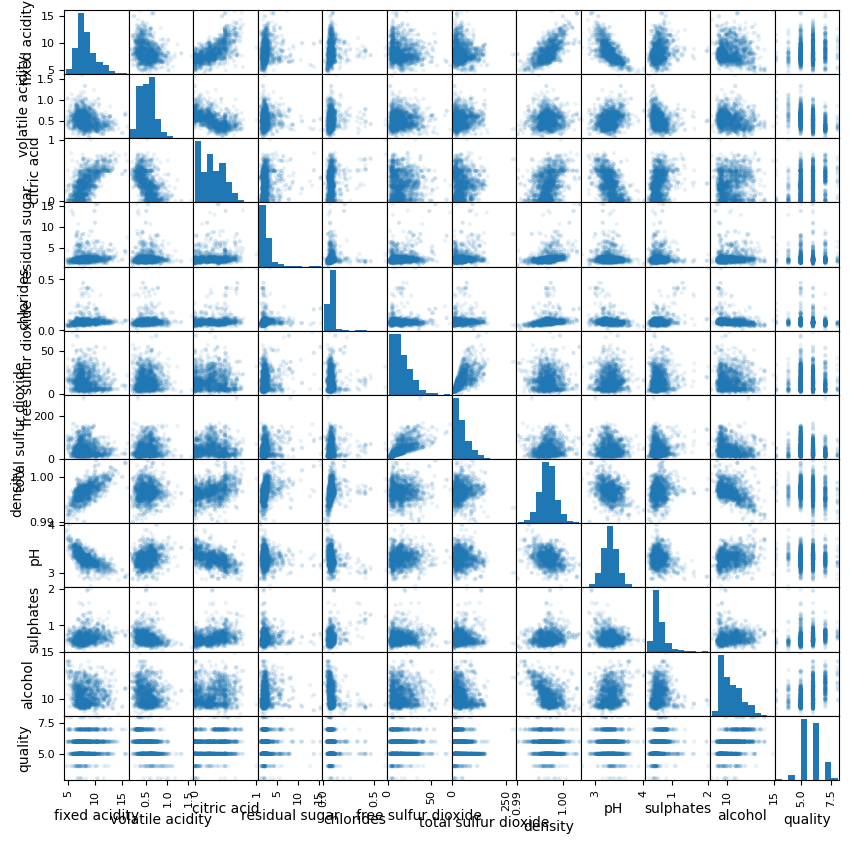

In [140]:
# Пропускаем строку с заголовком
columns = data.iloc[0]
data = data[1:]
data.columns = columns
data = data.apply(pd.to_numeric)

from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = 0.1, figsize = (10, 10))

Основные статистические характеристики:
0      fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

0        chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min     

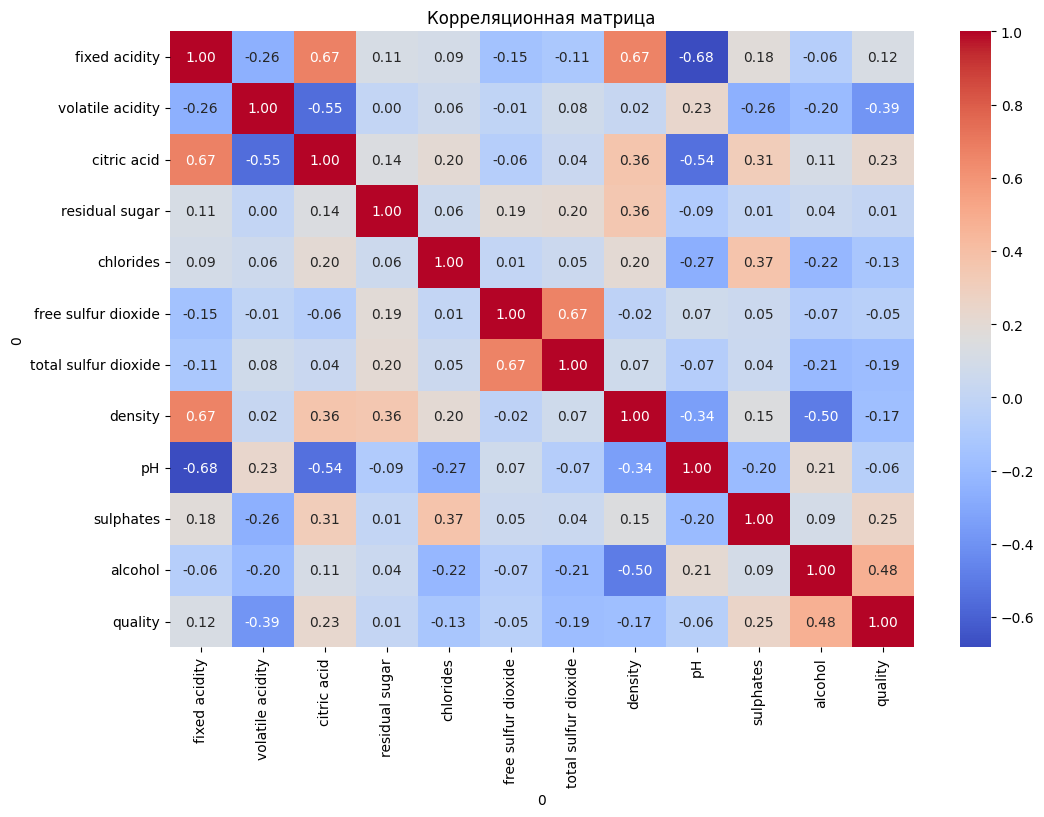

In [141]:


# Описание данных
print("Основные статистические характеристики:")
print(data.describe())

# Корреляционная матрица
print("\nКорреляционная матрица:")
correlation_matrix = data.corr()
print(correlation_matrix)

# Визуализация корреляционной матрицы
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()


Корелляционная матрица показывает несколько закономерностей.


1.   Летучие кислоты (volatile_acidity) сильно портят качество вина, а стабильные (fixed_acidity), наоборот, улучшают качество.
2.   Высокое содержание сульфатов и крепкость также улучшают качество.
3.   Высокая плотность, хлориды и диоксид серы также плохо влияют на качество.
4.   Остаточный сахар не влияет на качество существенно, однако существенно повышает плотность.


Подготовим данные, проверим пропущенные значения и выбросы



Пропущенные значения в данных:
0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Количество выбросов по признакам:
{'fixed acidity': 295, 'volatile acidity': 212, 'citric acid': 95, 'residual sugar': 320, 'chlorides': 401, 'free sulfur dioxide': 202, 'total sulfur dioxide': 238, 'density': 339, 'pH': 325, 'sulphates': 264, 'alcohol': 186}

Процент выбросов:
14.993746091307067


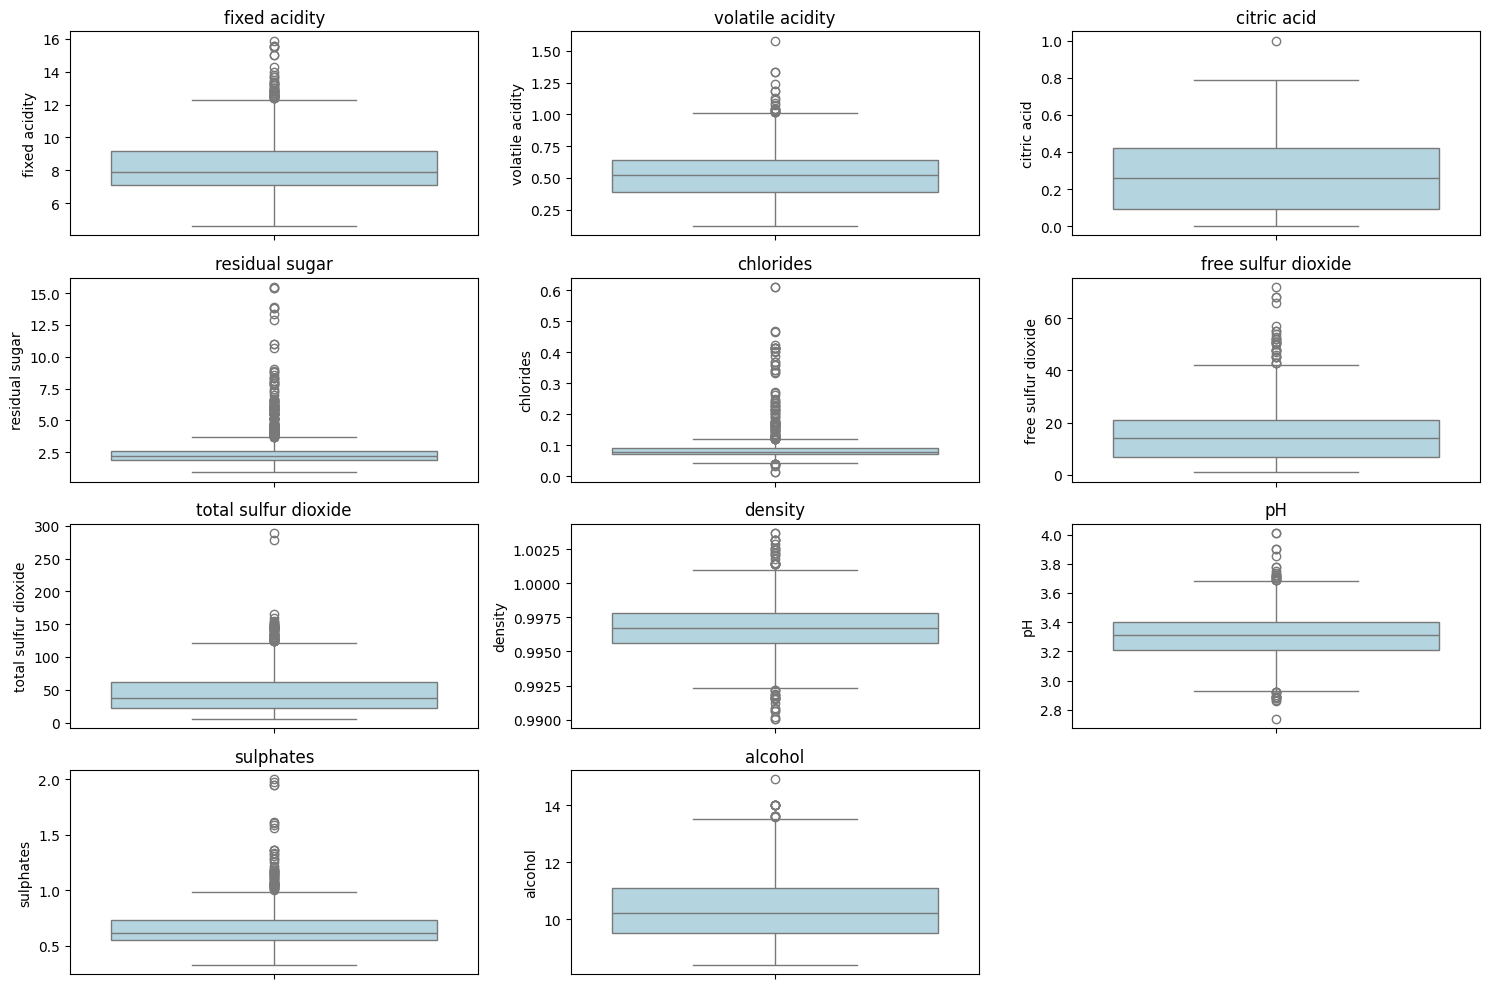

In [142]:
# Проверка на пропущенные значения
print("Пропущенные значения в данных:")
missing_values = data.isnull().sum()
print(missing_values)

# Проверка на выбросы с помощью метода IQR (межквартильный размах)
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 0.5 * IQR
    upper_bound = Q3 + 0.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

# Проверка на выбросы для каждого признака
outliers_sum = 0
outliers_dict = {}
for column in columns[:-1]:  # кроме 'quality', так как это целевая переменная
    outliers = detect_outliers(data, column)
    outliers_dict[column] = len(outliers)
    outliers_sum += len(outliers)

print("\nКоличество выбросов по признакам:")
print(outliers_dict)
print("\nПроцент выбросов:")
print(100 * outliers_sum /(len(columns)*len(data['quality'])))

# Визуализация выбросов через boxplot
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns[:-1], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data[column], color="lightblue")
    plt.title(column)
plt.tight_layout()
plt.show()


Датасет не имеет пропущенных значений, так что сотрем случайные данные а затем обработаем пропуски, просто потому что мы можем. Заодно обработаем выбросы

In [143]:
np.random.seed(1)

# Внесение пропусков (3%)
num_rows = data.shape[0]
missing_count = int(0.03 * num_rows)  # 3% от количества строк
for col in columns:
    missing_indices = np.random.choice(data.index, missing_count, replace=False)
    data.loc[missing_indices, col] = np.nan

# Заполнение пропущенных значений
data.fillna(data.median(), inplace=True)

# Удаление выбросов
for column in columns[:-1]:  # кроме 'quality'
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 0.5 * IQR
    upper_bound = Q3 + 0.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

print("\nДанные после обработки пропусков и выбросов:")
print(data.describe())



Данные после обработки пропусков и выбросов:
0      fixed acidity  volatile acidity  citric acid  residual sugar  \
count     190.000000        190.000000   190.000000      190.000000   
mean        7.506842          0.557053     0.145579        2.065263   
std         0.627083          0.105991     0.116521        0.313123   
min         6.100000          0.330000     0.000000        1.600000   
25%         7.100000          0.490000     0.030000        1.800000   
50%         7.500000          0.570000     0.140000        2.000000   
75%         7.900000          0.640000     0.240000        2.300000   
max         9.600000          0.760000     0.440000        2.800000   

0       chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  190.000000           190.000000            190.000000  190.000000   
mean     0.078047            13.989474             35.773684    0.996483   
std      0.006522             6.021118             14.776513    0.000824   
min      0

In [144]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
9,7.9,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7.0
25,6.9,0.400,0.14,2.4,0.085,21.0,40.0,0.99680,3.43,0.63,9.7,6.0
27,7.6,0.410,0.24,1.8,0.080,4.0,11.0,0.99620,3.28,0.59,9.5,5.0
29,7.1,0.710,0.00,1.9,0.080,14.0,35.0,0.99720,3.47,0.55,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0
1564,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0
1565,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5.0
1568,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.62,10.1,5.0


Категориальных признаков нет, остается только провести нормализацию



In [145]:
from sklearn.preprocessing import StandardScaler

# Разделение признаков и целевой переменной
X = data.drop("quality", axis=1)  # Все признаки
y = data["quality"]              # Целевая переменная

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем новый DataFrame с нормализованными данными
X_normalized = pd.DataFrame(X_scaled, columns=X.columns)

# Соединяем нормализованные признаки с целевой переменной
data_normalized = pd.concat([X_normalized, y.reset_index(drop=True)], axis=1)

print("\nНормализованные данные:")
data_normalized.head()



Нормализованные данные:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.468730,1.919816,-0.908487,0.751643,2.145080,0.168274,1.236724,0.628787,-1.540436,1.137369,-0.185911,5.0
1,0.628619,0.217075,-1.080583,-0.208977,-0.775983,-0.830852,-1.206011,0.385542,0.013082,-0.268160,-0.729343,7.0
2,-0.970279,-1.485667,-0.048006,1.071850,1.068899,1.167399,0.286771,0.385542,1.100545,0.785987,-0.367055,6.0
3,0.148950,-1.391070,0.812475,-0.849390,0.300198,-1.663456,-1.680988,-0.344191,-1.229732,0.083222,-0.729343,5.0
4,-0.650499,1.446833,-1.252679,-0.529184,0.300198,0.001753,-0.052497,0.872031,1.721952,-0.619542,-0.910486,5.0


Поскольку 8 классов это слишком много, для такой тонкой задачи как определение качества вина. упростим себе задачу. Отныне будем выделять всего 2 вида вина по качеству, хорошее и плохое. Пусть вино, у которого quality > 5 будет считаться хорошим, а остальное плохим. Заменим quality на бинарный признак

In [146]:
# Преобразование целевой переменной
data_normalized['quality'] = data_normalized['quality'].apply(lambda x: 1 if x > 5 else 0)

# Посмотрим новое соотношение классов
class_counts = data_normalized['quality'].value_counts()

# Распределение классов
bad_wines = class_counts[0]  # Плохие вина (quality = 0)
good_wines = class_counts[1]  # Хорошие вина (quality = 1)

# Вычисление соотношения
ratio = bad_wines / good_wines

print(f"Количество плохих вин: {bad_wines}")
print(f"Количество хороших вин: {good_wines}")
print(f"Соотношение плохих вин к хорошим: {ratio:.2f}")

Количество плохих вин: 94
Количество хороших вин: 96
Соотношение плохих вин к хорошим: 0.98


Разобьем данные на тестовую и обучающую выборку и решим задачу классификации методом ближайших соседей, Для начала возьмем k=5:

Ошибка на обучающей выборке: 0.2323943661971831
Ошибка на тестовой выборке: 0.2916666666666667
Accuracy Score train : 76.76%
Accuracy Score test : 70.83%


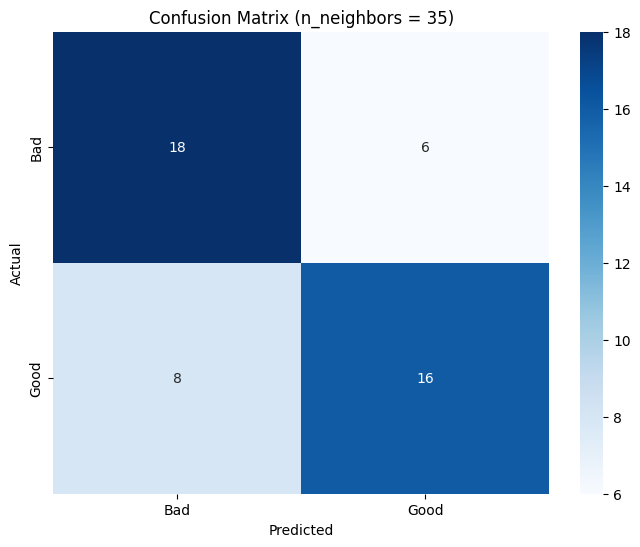

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Разделение данных на признаки и целевую переменную
X = data_normalized.drop("quality", axis=1)
y = data_normalized["quality"]

# Разделение на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Создание и обучение модели с n_neighbors = 5
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

# Предсказания для обучающей и тестовой выборок
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)

# Вывод ошибок и точности
train_error = np.mean(y_train != y_train_predict)
test_error = np.mean(y_test != y_test_predict)
print(f'Ошибка на обучающей выборке: {train_error}')
print(f'Ошибка на тестовой выборке: {test_error}')
print(f'Accuracy Score train : {accuracy_score(y_train, y_train_predict)*100:.2f}%')
print(f'Accuracy Score test : {accuracy_score(y_test, y_test_predict)*100:.2f}%')

# Построение confusion matrix
cm_knn = confusion_matrix(y_test, y_test_predict)

# Визуализация confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (n_neighbors = 35)')
plt.show()


Результаты очень неплохие, попробуем подобрать гиперпараметр, чтобы улучшить их.

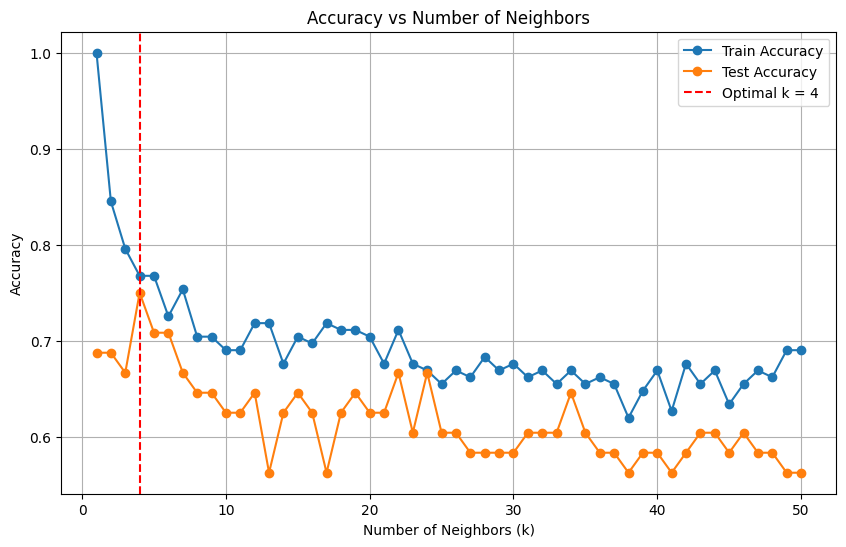

Оптимальное значение k: 4
Лучшая точность на тестовой выборке: 75.00%


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Разделение данных на признаки и целевую переменную
X = data_normalized.drop("quality", axis=1)
y = data_normalized["quality"]

# Разделение на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Подбор параметра k
k_values = range(1, 51)  # Перебираем k от 1 до 50
train_accuracies = []
test_accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)

    # Вычисление точности на обучающей и тестовой выборках
    train_accuracies.append(accuracy_score(y_train, model.predict(x_train)))
    test_accuracies.append(accuracy_score(y_test, model.predict(x_test)))

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
plt.axvline(x=np.argmax(test_accuracies) + 1, color='red', linestyle='--', label=f'Optimal k = {np.argmax(test_accuracies) + 1}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors')
plt.legend()
plt.grid()
plt.show()

# Оптимальное значение k
optimal_k = np.argmax(test_accuracies) + 1
print(f'Оптимальное значение k: {optimal_k}')
print(f'Лучшая точность на тестовой выборке: {max(test_accuracies)*100:.2f}%')


Метод был протестирован с различными значениями параметра k. Определение класса по ближайшему соседу при k = 4 показало наивысшую точность классификации ~75% на тестовой выборке. Стоит отметить что количество соседей не дает существенного эффекта на точность и лишь постепенно уменьшает ее.

**Кластеризация**

Решим задачу кластеризации для нашего датасета.

Сначала мы извлекаем целевые метки из набора данных, которые находятся в столбце quality, и сохраняем их в переменную y. Эти метки представляют собой истинные значения, с которыми мы будем сравнивать результаты кластеризации. Признаки для кластеризации, которые содержат информацию о каждом объекте (строке данных), сохраняются в переменной X. Из этой матрицы признаков мы удаляем столбец с целевой переменной (quality). Затем данные масштабируются с помощью стандартизации, где каждый признак приводится к среднему значению 0 и стандартному отклонению 1. Это нужно, чтобы избежать искажений из-за различий в масштабах признаков, поскольку алгоритмы кластеризации чувствительны к этим различиям. Для стандартизации используется класс StandardScaler из библиотеки sklearn, который вычисляет среднее значение и стандартное отклонение для каждого признака и затем применяет к данным преобразование.

In [149]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Разделим данные на признаки и целевую переменную
X = data_normalized.drop("quality", axis=1)
y = data_normalized["quality"]

# Масштабируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Проецируем данные в двухмерную плоскость используя метод главных компонент

In [150]:
# Применим PCA для визуализации данных в 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



Применяем три метода кластеризации: KMeans, DBSCAN и агломеративную кластеризацию. KMeans делит данные на два кластера, используя фиксированное количество кластеров. DBSCAN основывается на плотности, выделяя кластеры и выбросы. Агломеративная кластеризация строит дерево кластеров и объединяет объекты в два кластера. Все три метода присваивают метки, которые используются для оценки качества кластеризации.
Потом оцениваем качество кластеризации с помощью Adjusted Rand Index (ARI).

Silhouette Score for KMeans: 0.1194
Silhouette Score for DBSCAN: 0.1802
Silhouette Score for Agglomerative Clustering: 0.1125


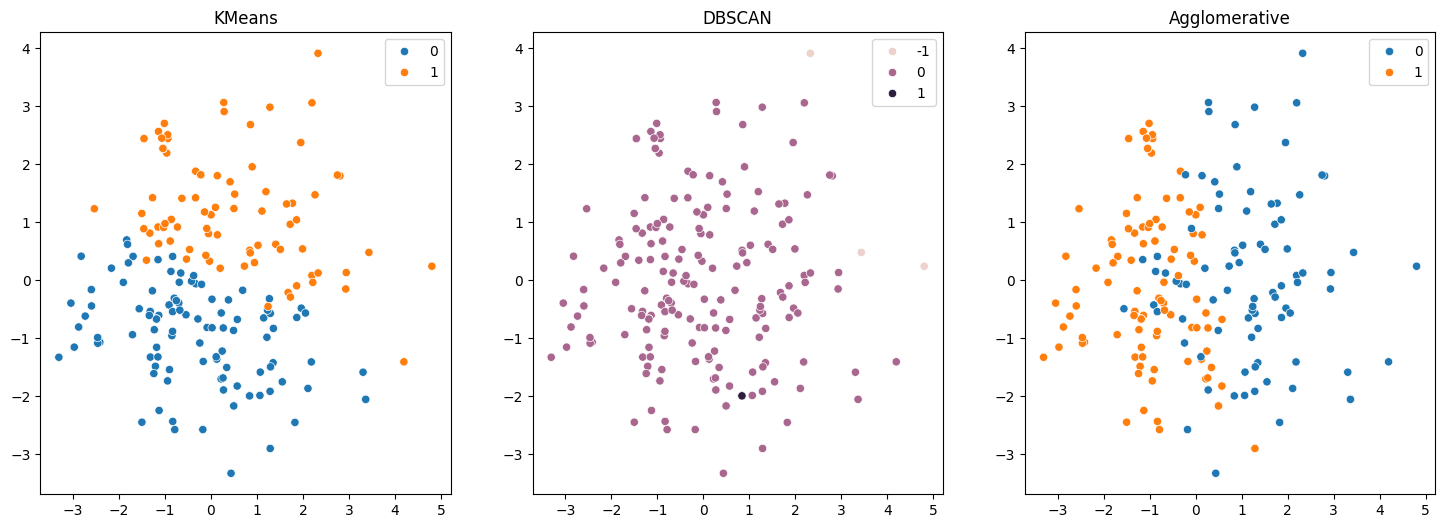

In [155]:
# 1. KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 2. DBSCAN
dbscan = DBSCAN(eps=3.3, min_samples=2)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 3. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2)
agglo_labels = agglo.fit_predict(X_scaled)

# Рассчитаем Silhouette Score для каждой модели
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1  # Если есть выбросы (метка -1), считаем, что оценки нет
silhouette_agglo = silhouette_score(X_scaled, agglo_labels)

# Выводим результаты Silhouette Score
print(f"Silhouette Score for KMeans: {silhouette_kmeans:.4f}")
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan:.4f}")
print(f"Silhouette Score for Agglomerative Clustering: {silhouette_agglo:.4f}")

# Визуализация кластеров

# Создание графиков
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Визуализация для KMeans
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, ax=axs[0])
axs[0].set_title("KMeans")

# Визуализация для DBSCAN
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels , ax=axs[1])
axs[1].set_title("DBSCAN")

# Визуализация для Agglomerative
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agglo_labels, ax=axs[2])
axs[2].set_title("Agglomerative")

plt.show()


**Анализ результатов**

KMeans показывает небольшой, но положительный Silhouette Score. Это означает, что алгоритм все же находит некоторое разделение между кластерами, хотя оно и не идеально.

Agglomerative Clustering также показывает низкий Silhouette Score, но в целом результаты схожи с KMeans. Алгоритм может создавать разумные группы, но они все еще не идеально отделены.

DBSCAN показывает наилучшие результаты. Хотя визуально кластеризация не выглядит очень эффективной.



Посмотрим как выглядела бы идеальная кластеризация

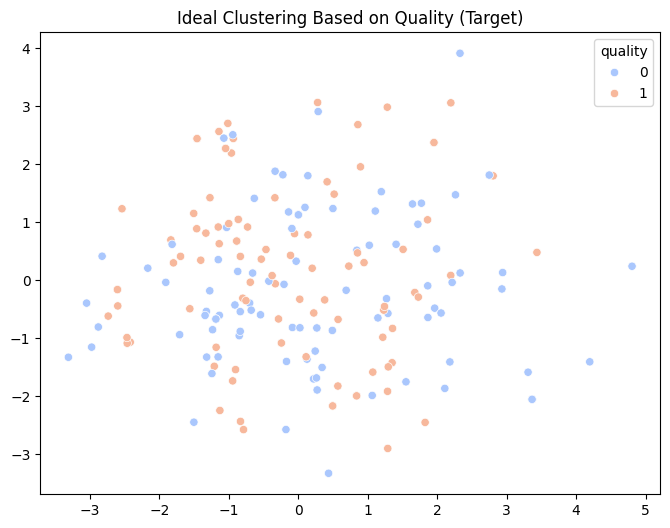

In [152]:
# Визуализация идеальной кластеризации (используем целевую переменную)
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="coolwarm", ax=ax)
ax.set_title("Ideal Clustering Based on Quality (Target)")
plt.show()


И сразу становится понятно почему ни один метод не справился. Мы видим что кластеры настолько сильно пересекаются, что разделить их чрезвычайно трудно. Так или иначе, KMeans оказался самым эффективным из рассмотренных методов.